In [1]:
import pylab
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [4]:
geo = pd.read_excel('C:/Users/79251/Downloads/Материалы_к_занятию_Алгоритмы_кластеризации/homework/geo.xlsx')

In [5]:
geo.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [6]:
geo=geo.drop(['Unnamed: 0'], axis=1)

In [7]:
geo.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [8]:
geo.shape

(108806, 3)

In [9]:
geo.dropna()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1
5,37.558526,55.728758,-1
6,37.566431,55.731794,-1
7,37.558957,55.723399,-1
8,37.558957,55.723399,-1
9,37.565767,55.734567,-1


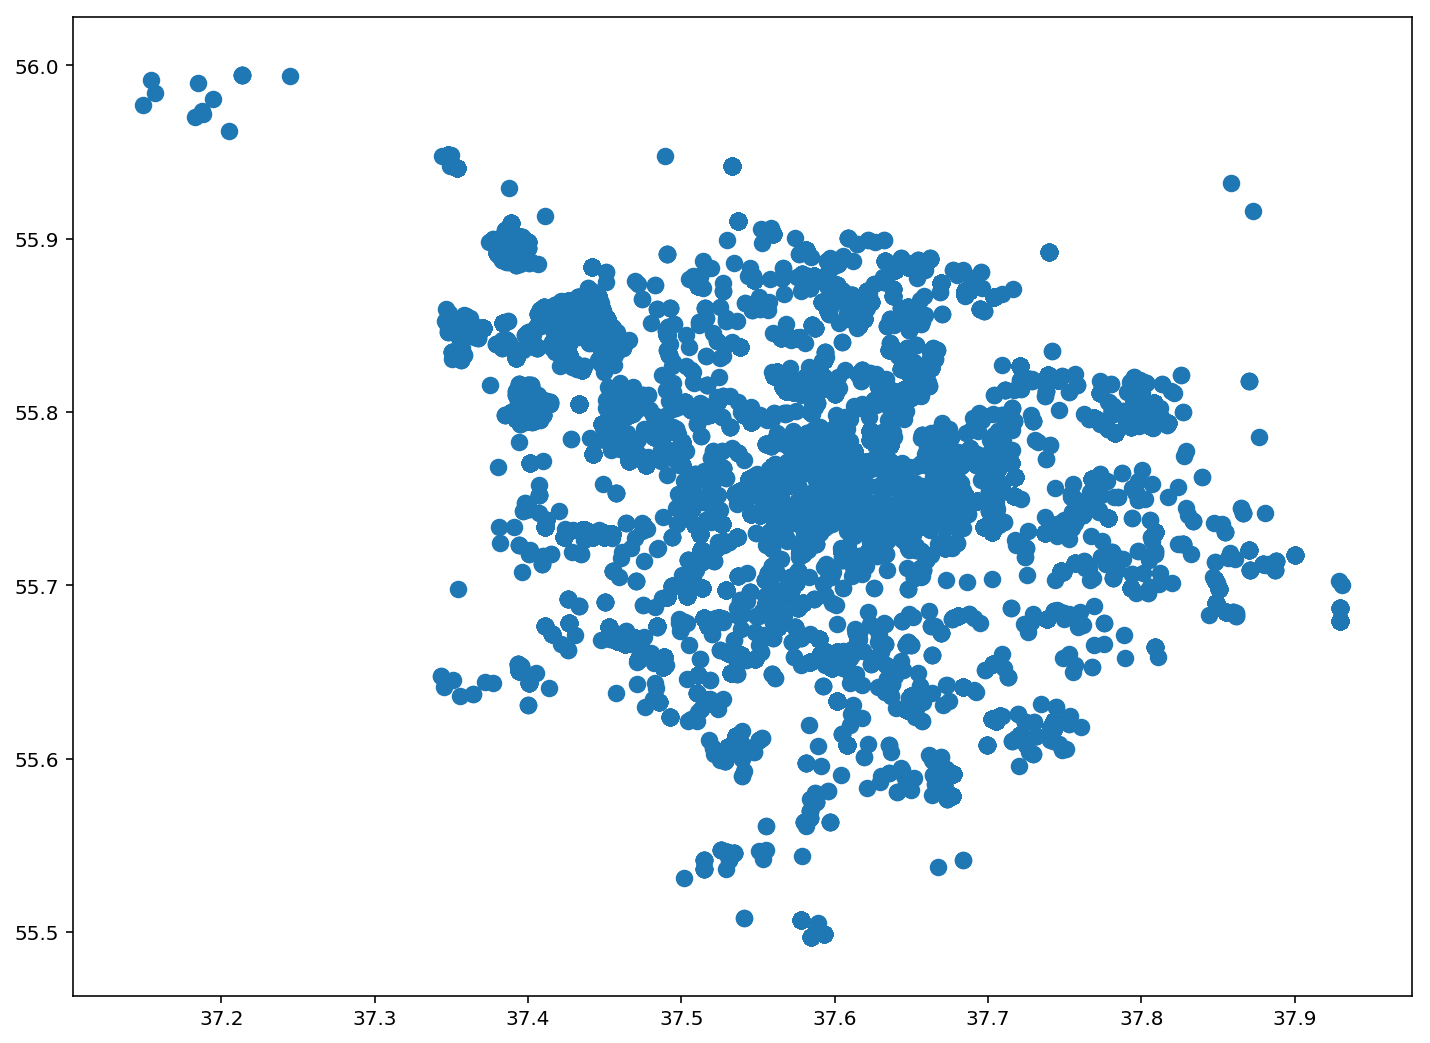

In [10]:
plt.scatter(geo['x'], geo['y'], c=None, cmap='autumn', s=60)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
geo_n=geo.to_numpy()
geo_n

array([[37.612416, 55.777454, -1.      ],
       [37.612416, 55.777454, -1.      ],
       [37.603298, 55.742108, -1.      ],
       ...,
       [37.421066, 55.848756,  1.      ],
       [37.448509, 55.793065, -1.      ],
       [37.451249, 55.83662 , -1.      ]])

In [14]:
geo_n[:,:2]

array([[37.612416, 55.777454],
       [37.612416, 55.777454],
       [37.603298, 55.742108],
       ...,
       [37.421066, 55.848756],
       [37.448509, 55.793065],
       [37.451249, 55.83662 ]])

In [15]:
XY_scaled = scaler.fit_transform(geo_n[:,:2])

In [16]:
XY_scaled

array([[ 0.36791896,  0.15955291],
       [ 0.36791896,  0.15955291],
       [ 0.2931784 , -0.34813064],
       ...,
       [-1.20058354,  1.1836816 ],
       [-0.97563233,  0.38377766],
       [-0.95317246,  1.00936916]])

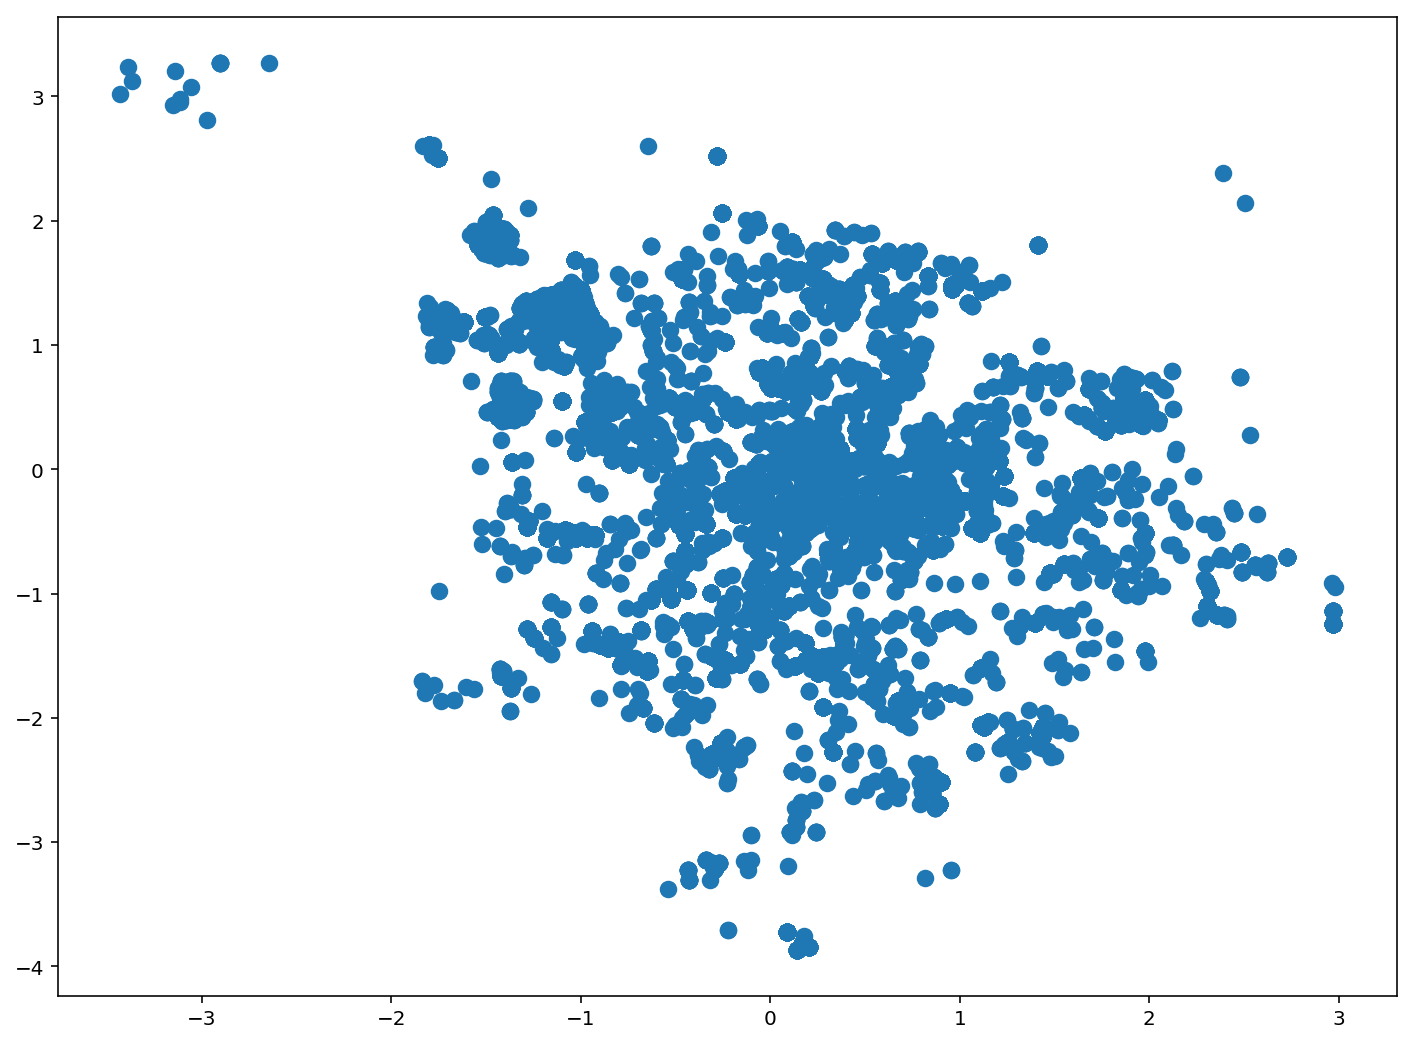

In [17]:
plt.scatter(XY_scaled[:, 0], XY_scaled[:, 1], c=None, cmap='autumn', s=60)

In [18]:
k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(XY_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

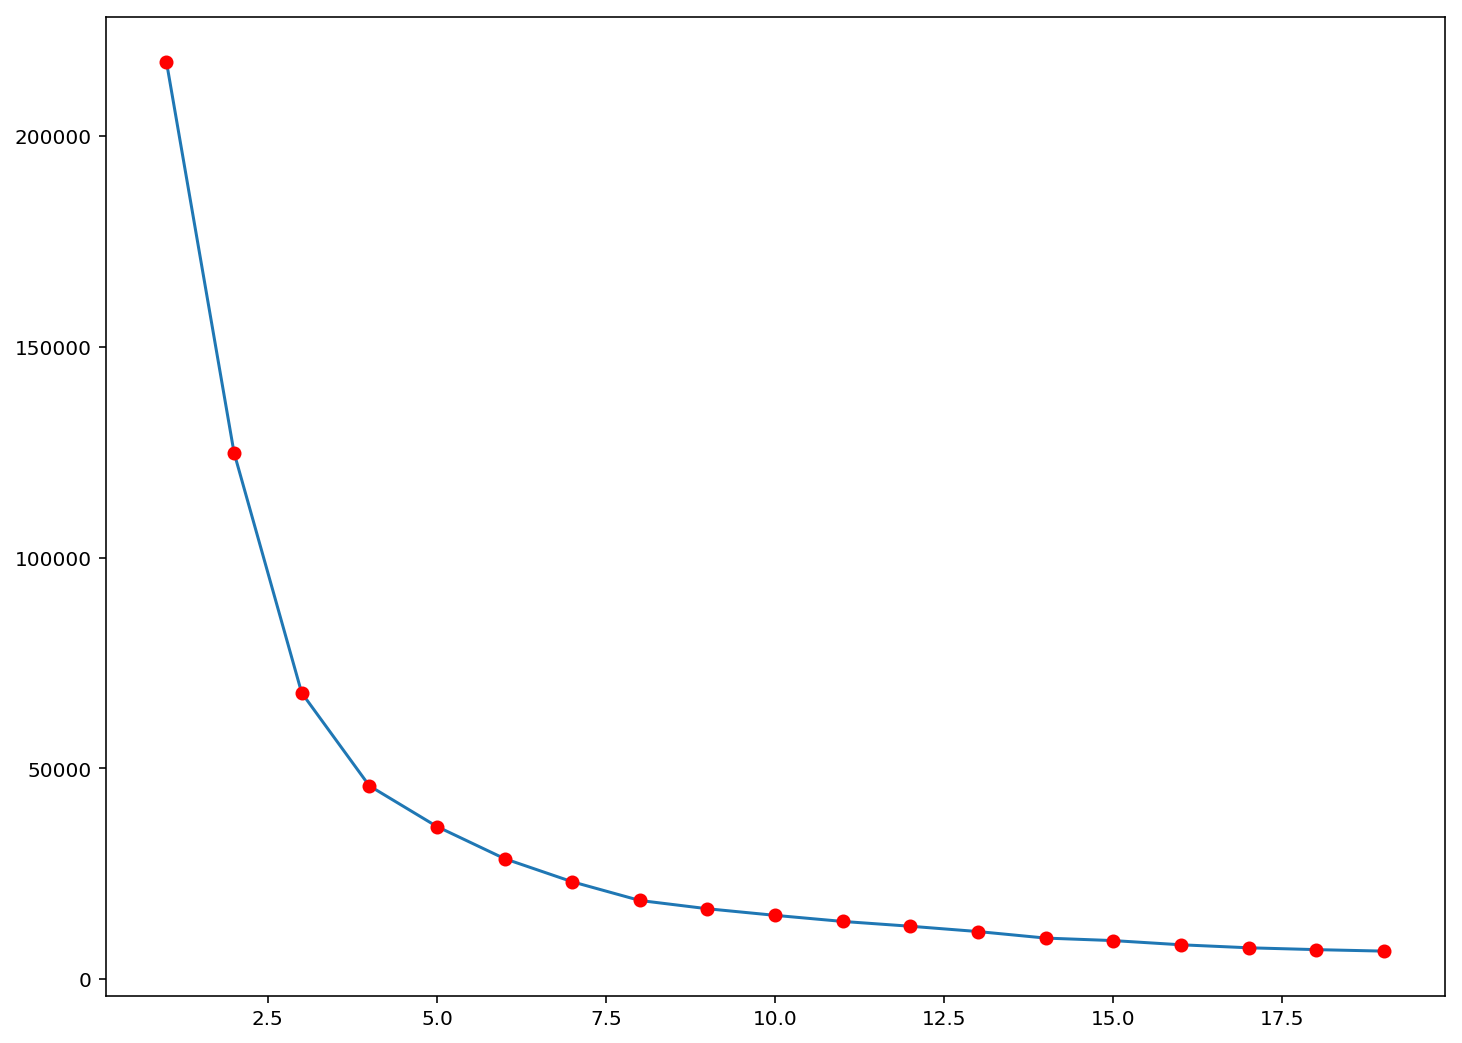

In [19]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [20]:
diff = np.diff(k_inertia)

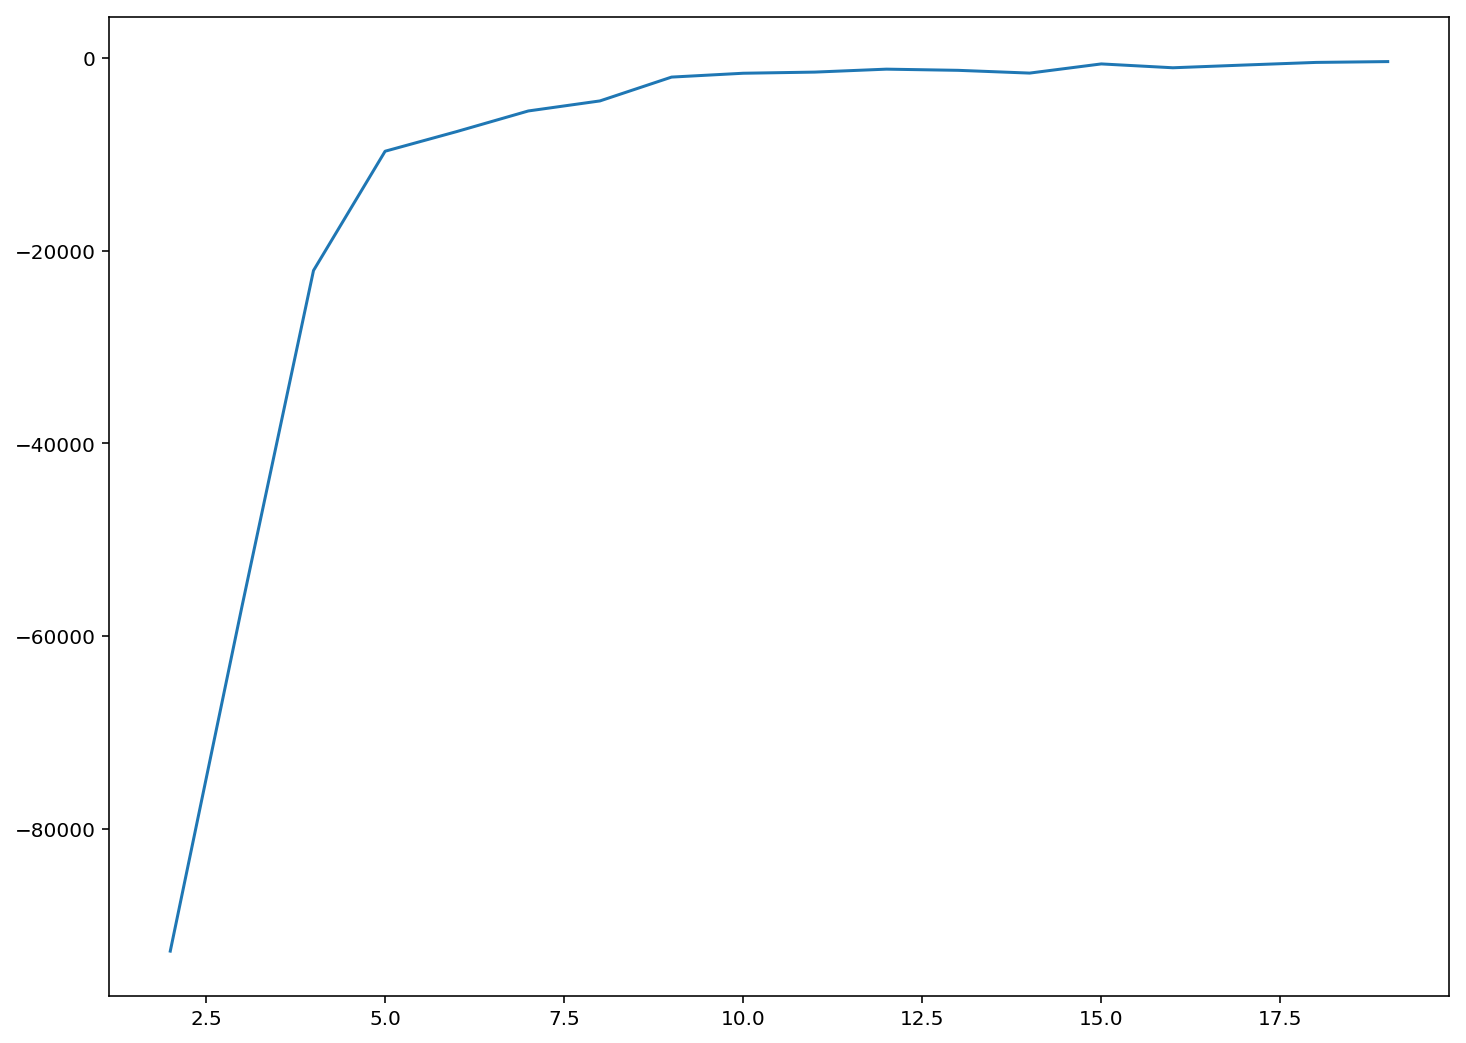

In [21]:
plt.plot(ks[1:], diff)

In [22]:
diff_r = diff[1:] / diff[:-1]

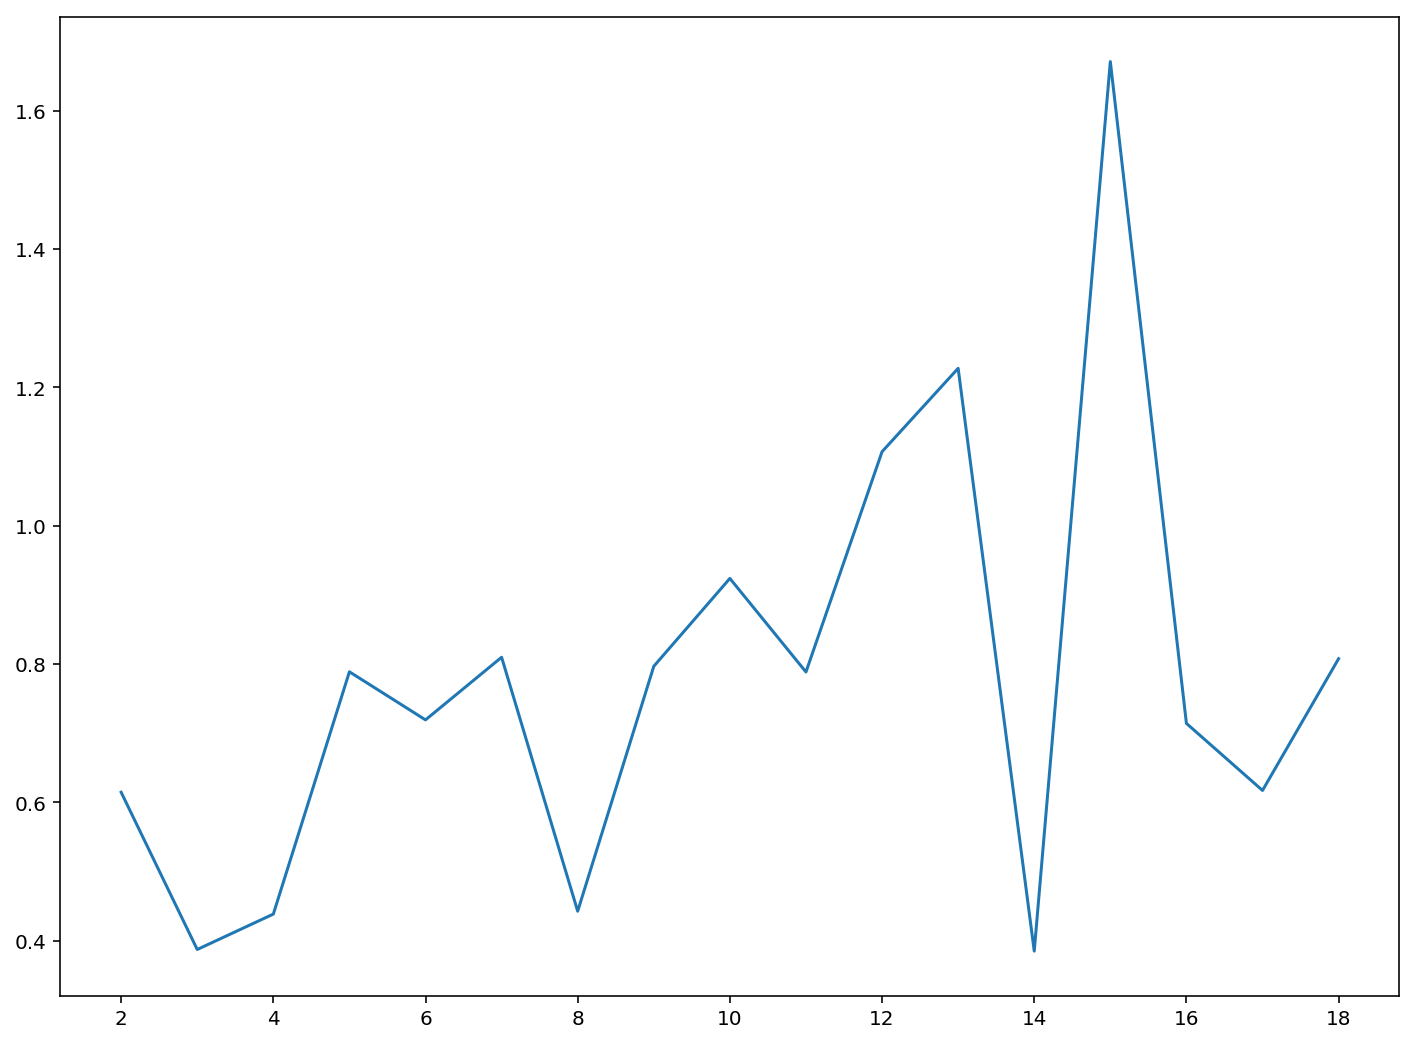

In [23]:
plt.plot(ks[1:-1], diff_r)

In [24]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

14

In [25]:
clst = KMeans(n_clusters=14)
clusters = clst.fit_predict(XY_scaled)

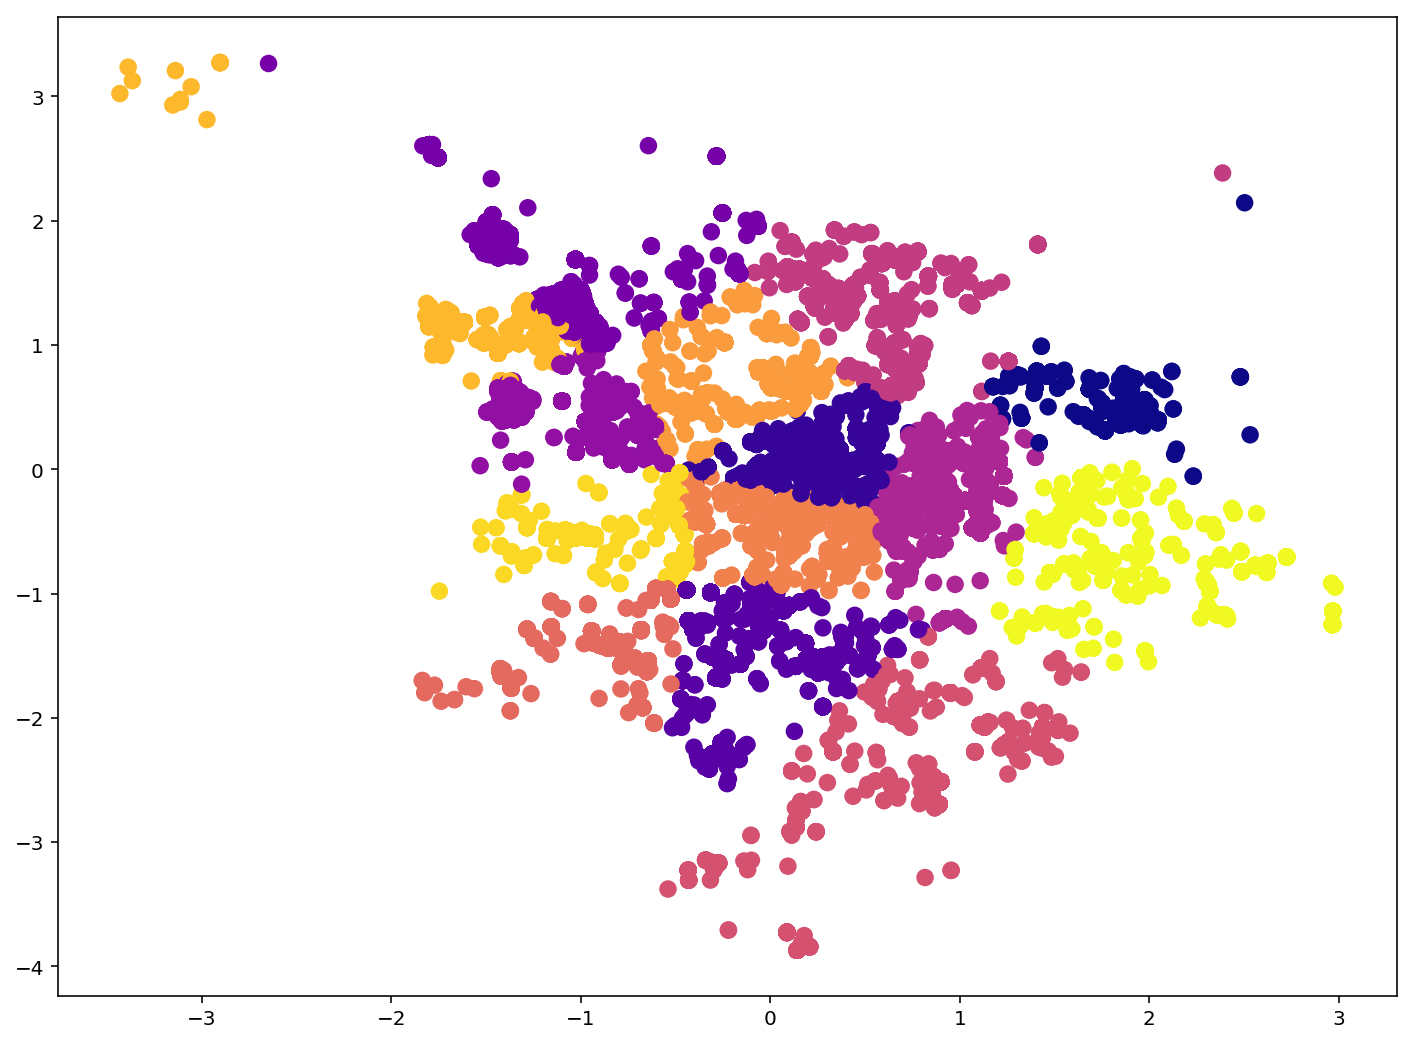

In [26]:
plt.scatter(XY_scaled[:, 0], XY_scaled[:, 1], c=clusters, cmap='plasma', s=60)

In [33]:
geo_plus=geo.loc[geo['comment_class'] == 1]
geo_plus_n=geo_plus.to_numpy()
XY_plus_scaled = scaler.fit_transform(geo_plus_n[:,:2])
XY_plus_scaled

array([[-0.16701157, -0.66683515],
       [-0.1640515 , -0.79116702],
       [-0.3947497 , -0.88011374],
       ...,
       [-1.19866757,  0.85950028],
       [-1.17409523,  0.14520085],
       [-1.42485448,  1.05523145]])

In [76]:
clst_dbscan = DBSCAN(eps=0.15, min_samples=10)

In [77]:
clusters_plus_votes = clst_dbscan.fit_predict(XY_plus_scaled)

In [78]:
clusters_plus_votes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
silhouette_score(XY_plus_scaled, clusters_plus_votes)

0.20542461436836862

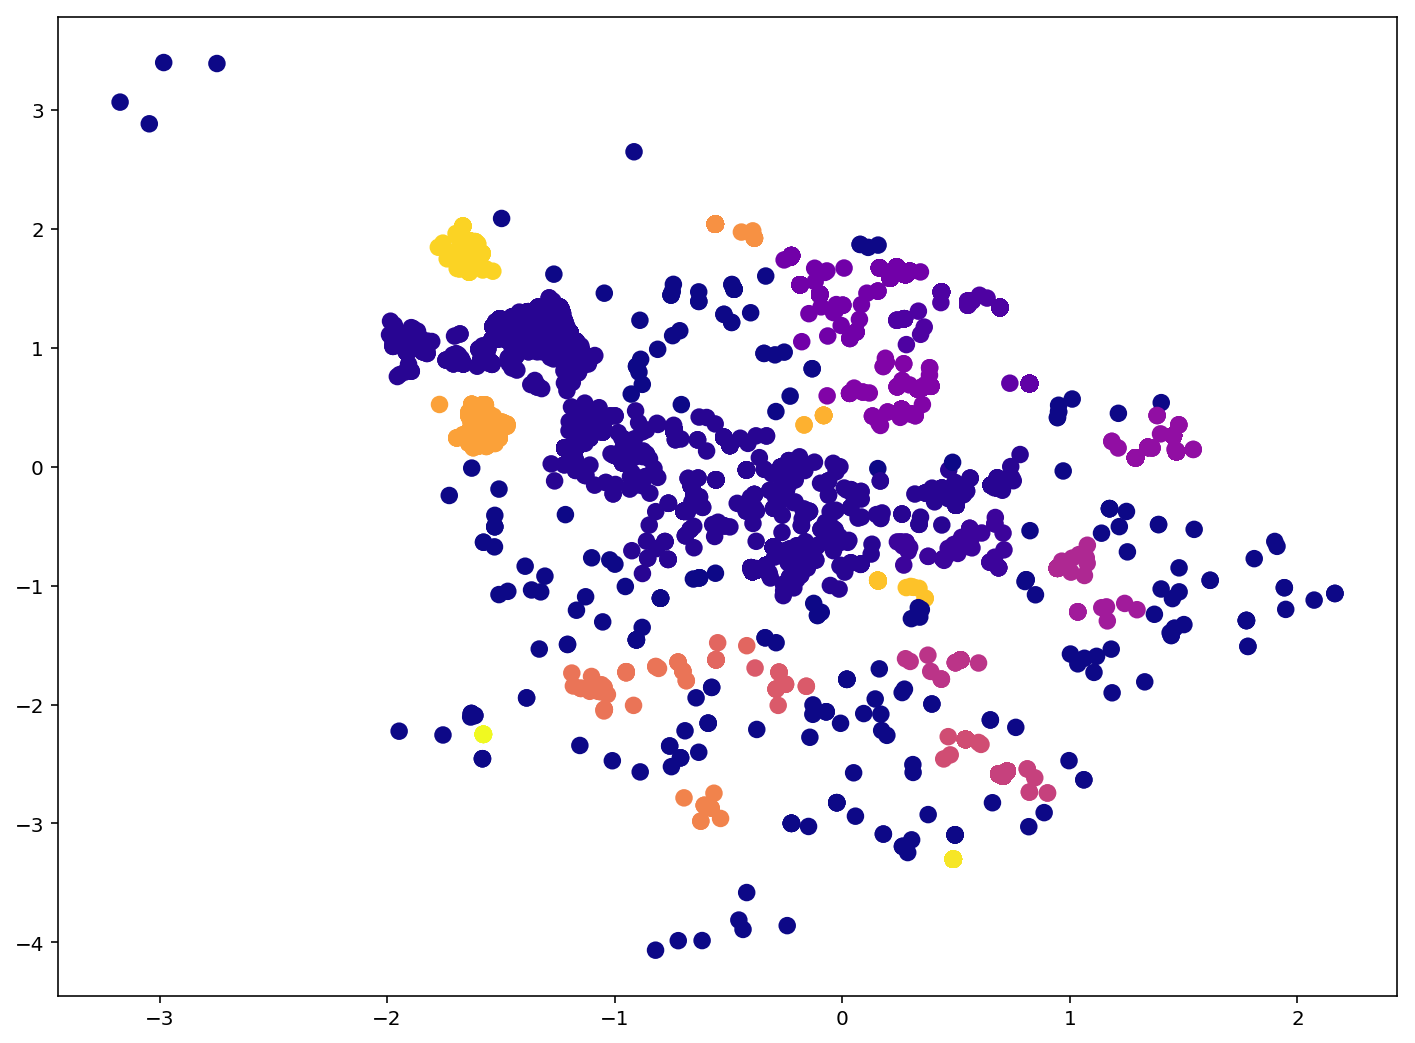

In [80]:
plt.scatter(XY_plus_scaled[:, 0], XY_plus_scaled[:, 1], c=clusters_plus_votes, cmap='plasma', s=60)

In [81]:
geo_minus=geo.loc[geo['comment_class'] == -1]
geo_minus_n=geo_minus.to_numpy()
XY_minus_scaled = scaler.fit_transform(geo_minus_n[:,:2])
XY_minus_scaled

array([[ 0.43002964,  0.19265922],
       [ 0.43002964,  0.19265922],
       [ 0.35337802, -0.31003917],
       ...,
       [-1.4874462 ,  1.92227958],
       [-0.94787529,  0.4146822 ],
       [-0.92484113,  1.03413074]])

In [88]:
clst_dbscan_minus = DBSCAN(eps=0.05, min_samples=15)

In [89]:
clusters_minus_votes = clst_dbscan_minus.fit_predict(XY_minus_scaled)

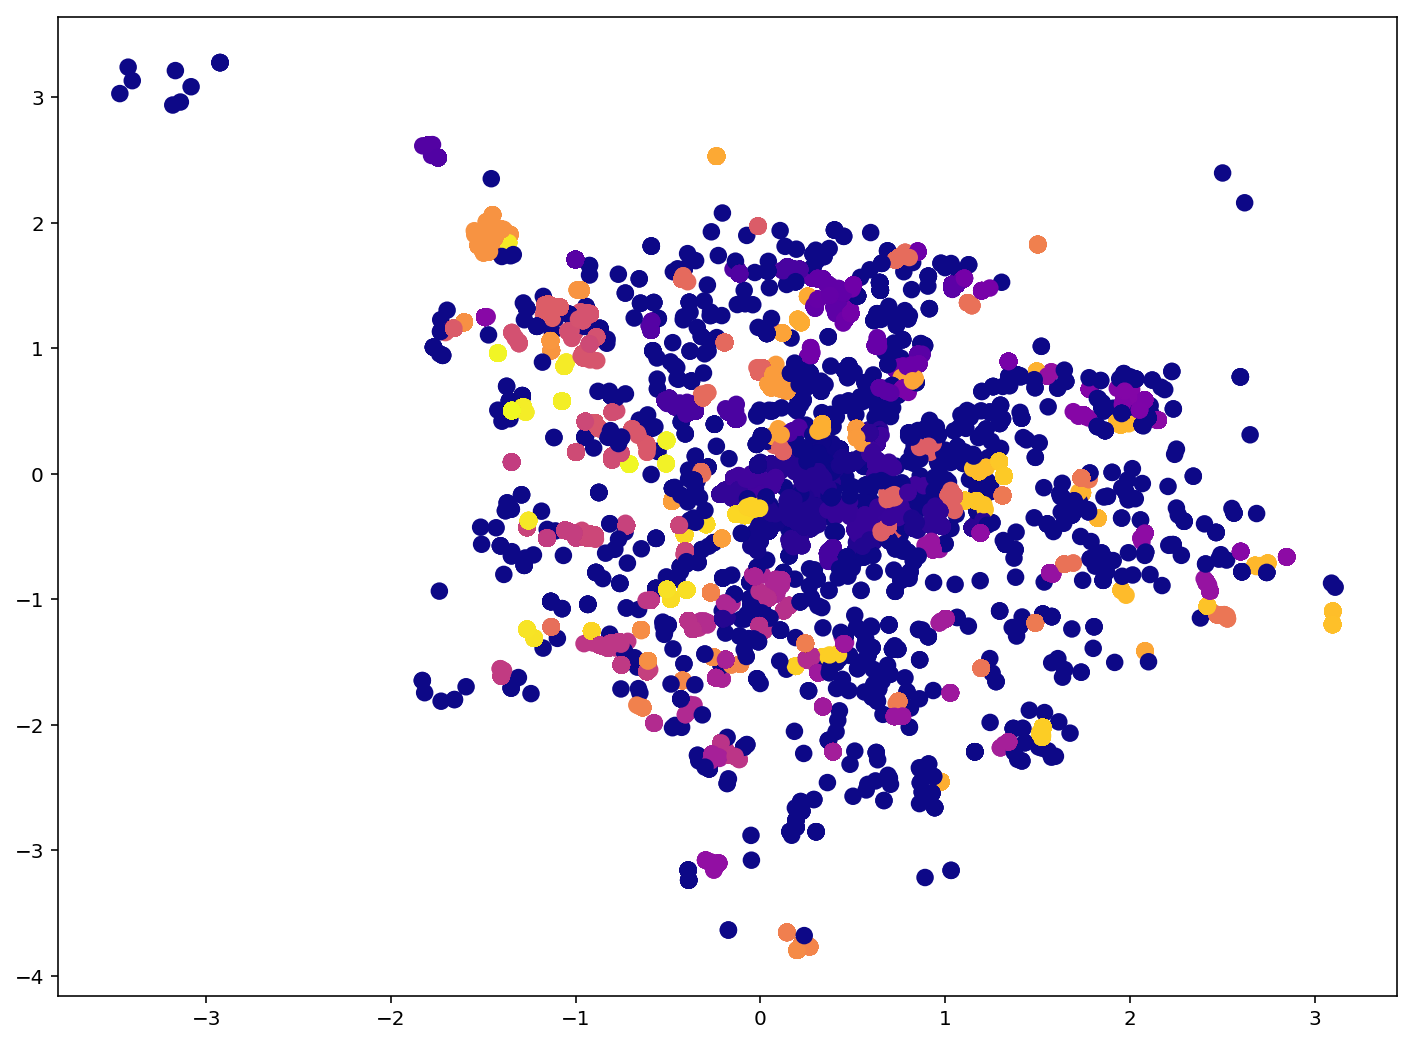

In [90]:
plt.scatter(XY_minus_scaled[:, 0], XY_minus_scaled[:, 1], c=clusters_minus_votes, cmap='plasma', s=60)